In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.shape

(299, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
data.head(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1


Text(0.5, 1.0, 'No Of Death Event')

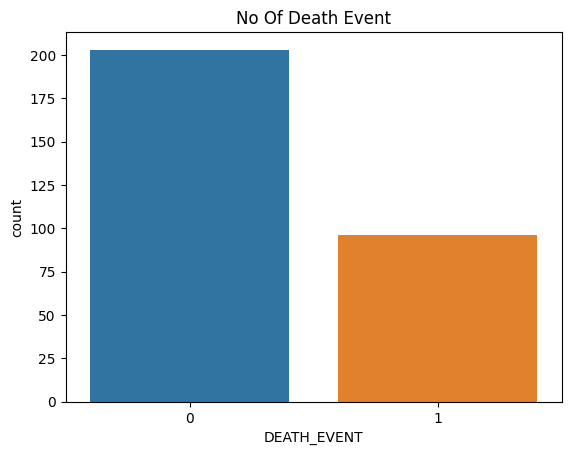

In [ ]:
sns.countplot(x='DEATH_EVENT',data=data)
plt.title('No Of Death Event')

In [ ]:
# Splitting the givin dataset into dependent and independent variables
X=data.drop(columns='DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']

In [ ]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [ ]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_test=scaler.transform(X_test)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(299, 12) (200, 12) (99, 12)


In [ ]:
X_train

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -5.58317804e-01],
       [ 3.50832977e-01, -8.71104775e-01, -4.84006302e-01, ...,
         7.35688190e-01, -6.87681906e-01, -8.16434577e-01],
       [ 2.03505748e+00, -8.71104775e-01, -5.76917780e-01, ...,
         7.35688190e-01, -6.87681906e-01, -1.31976229e+00],
       ...,
       [-4.91279276e-01, -8.71104775e-01,  1.71535786e-01, ...,
         7.35688190e-01, -6.87681906e-01, -5.45411965e-01],
       [-1.41760275e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01,  1.45416070e+00,  1.46789887e+00],
       [ 1.61400136e+00, -8.71104775e-01,  3.26388248e-01, ...,
         7.35688190e-01,  1.45416070e+00, -5.58317804e-01]])

In [ ]:
X_test

array([[ 7.71889104e-01, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01,  1.45416070e+00,  1.54533390e+00],
       [-9.12335403e-01,  1.14796753e+00, -2.93021599e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.41627551e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.92033626e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.62725792e-02],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.65728387e-04, ...,
        -1.35927151e+00, -6.87681906e-01,  1.46789887e+00],
       [-1.75444766e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01,  1.46789887e+00],
       [ 9.40311555e-01,  1.14796753e+00, -4.87103352e-01, ...,
         7.35688190e-01,  1.45416070e+00, -8.42246255e-01]])

In [ ]:
from keras import callbacks
early_stopping=callbacks.EarlyStopping(monitor='val_loss',
                                    min_delta=0.001,
                                       patience=30,
                                       verbose=1,
                                       mode='auto',
                                       restore_best_weights=True)

In [ ]:
from keras.layers.regularization.dropout import Dropout
import keras
from keras.models import Sequential
from keras.layers import Dense
# Now initilizing the neural network
model=Sequential()

# layers
model.add(Dense(units=32,activation='relu',kernel_initializer='uniform',input_dim=12))
model.add(Dense(units=8,activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.5))
model.add(Dense(units=4,activation='relu',kernel_initializer='uniform'))
model.add(Dense(0.5))
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 32)                416       
                                                                 
 dense_25 (Dense)            (None, 8)                 264       
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dense_27 (Dense)            (None, 0)                 0         
                                                                 
 dense_28 (Dense)            (None, 1)                 1         
                                                                 
Total params: 717
Trainable params: 717
Non-trainable 

In [ ]:
history=model.fit(X_train,y_train,batch_size=32,epochs=250,callbacks=[early_stopping],validation_split=0.2)

Epoch 1/250
5/5 [==============================] - 3s 51ms/step - loss: 0.6927 - accuracy: 0.7125 - val_loss: 0.6917 - val_accuracy: 0.8000
Epoch 2/250
5/5 [==============================] - 0s 10ms/step - loss: 0.6916 - accuracy: 0.7125 - val_loss: 0.6902 - val_accuracy: 0.8000
Epoch 3/250
5/5 [==============================] - 0s 15ms/step - loss: 0.6907 - accuracy: 0.7125 - val_loss: 0.6888 - val_accuracy: 0.8000
Epoch 4/250
5/5 [==============================] - 0s 13ms/step - loss: 0.6896 - accuracy: 0.7125 - val_loss: 0.6873 - val_accuracy: 0.8000
Epoch 5/250
5/5 [==============================] - 0s 11ms/step - loss: 0.6887 - accuracy: 0.7125 - val_loss: 0.6859 - val_accuracy: 0.8000
Epoch 6/250
5/5 [==============================] - 0s 14ms/step - loss: 0.6877 - accuracy: 0.7125 - val_loss: 0.6845 - val_accuracy: 0.8000
Epoch 7/250
5/5 [==============================] - 0s 12ms/step - loss: 0.6867 - accuracy: 0.7125 - val_loss: 0.6831 - val_accuracy: 0.8000
Epoch 8/250
5/5 [===

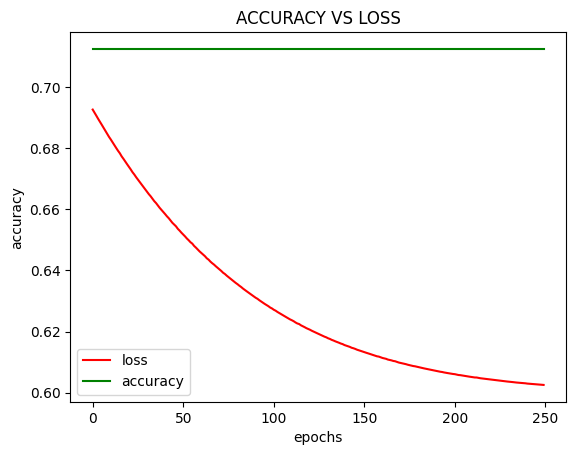

In [ ]:
plt.plot(history.history['loss'],color='r',label="loss")
plt.plot(history.history['accuracy'],color='g',label='accuracy')
plt.xlabel("epochs")
plt.ylabel('accuracy')
plt.title("ACCURACY VS LOSS")
plt.legend()
plt.show()

In [ ]:
accuracy=np.mean(history.history['val_accuracy'])
print("\n%s:%.2f%%"%("val_accuracy",accuracy*100))


val_accuracy:80.00%


In [ ]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()
#acc=accuracy_score(y_pred,y_test)
#print("\n%s:%.2f%%"%("Accuracy is",acc*100))

4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)

99


<Axes: >

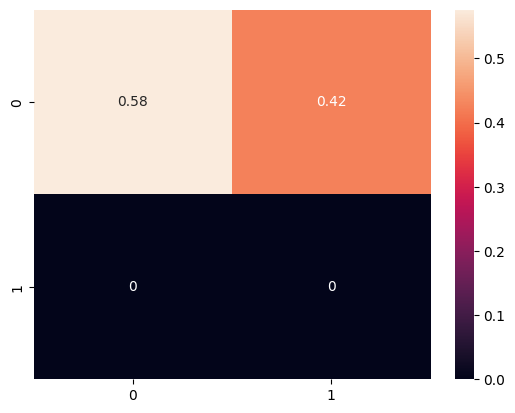

In [ ]:
import seaborn as sns
print(np.sum(cm))
sns.heatmap(cm/np.sum(cm),annot=True)